In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../data/Backend_logs.csv')


In [3]:
data.head()

,Operation,Request time,Response time
0,GetTrackingData,1/1/2023 10:00:23.000,1/1/2023 10:00:23.300
1,SetPayment,1/1/2023 10:13:14.230,1/1/2023 10:13:15.697
2,SetPayment,1/1/2023 10:26:05.460,1/1/2023 10:26:06.410
3,GetPaymentMethods,1/1/2023 10:38:56.690,1/1/2023 10:38:57.057
4,SetDeliveryAddress,1/1/2023 10:51:47.920,1/1/2023 10:51:48.620


In [4]:
data.describe()

,Operation,Request time,Response time
count,9999,9999,9999
unique,14,9998,9997
top,GetPaymentMethods,##############################################...,0/1/1900 00:00:00.000
freq,787,2,3


In [5]:
data.isnull().sum()

Operation        0
Request time     0
Response time    0
dtype: int64

In [6]:
data.dtypes

Operation        object
Request time     object
Response time    object
dtype: object

In [7]:
# check for duplicates in the data
print(data.duplicated().sum())

0


In [8]:
# change the data type of the time columns to datetime
data['Request time'] = pd.to_datetime(data['Request time'], errors='coerce')
data['Response time'] = pd.to_datetime(data['Response time'], errors='coerce')

In [9]:
data.isnull().sum()

Operation        0
Request time     4
Response time    7
dtype: int64

In [10]:
request_time = data['Request time']

In [11]:
data['Operation time'] = data['Response time'] - data['Request time']

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        9.988e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

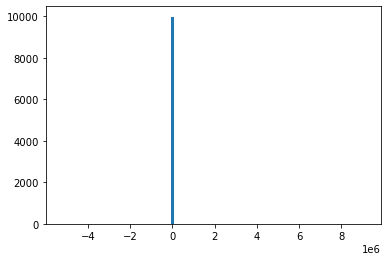

In [12]:
plt.hist(data['Operation time'].dt.total_seconds(), bins=100)

In [13]:
data['Operation time'].dt.total_seconds().describe()

count    9.990000e+03
mean     3.924319e+02
std      1.057238e+05
min     -5.270400e+06
25%      4.710000e-01
50%      9.500000e-01
75%      1.417000e+00
max      9.158402e+06
Name: Operation time, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3312f4d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a3312f53f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3312f4ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3312f58d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a3312f5ba0>],
 'means': []}

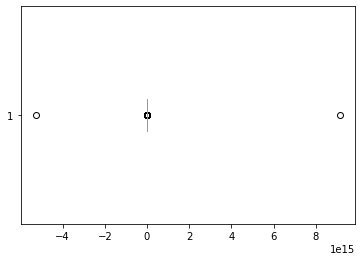

In [14]:
plt.boxplot(data['Operation time'], vert=False)

In [15]:
# check for outliers in the operation time 
Q1 = data['Operation time'].quantile(0.25)
Q3 = data['Operation time'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0 days 00:00:00.946000


In [16]:
data_iqr = data[~((data['Operation time'] < (Q1 - 1.5 * IQR)) |(data['Operation time'] > (Q3 + 1.5 * IQR)))]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a330f60d60>,
 'caps': [<matplotlib.lines.Line2D at 0x2a330f61300>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a330f60a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2a330f618a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a330f61b70>],
 'means': []}

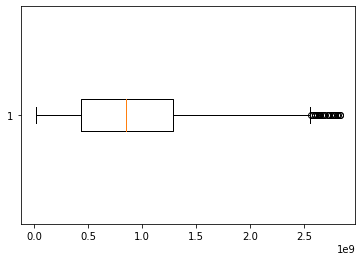

In [26]:
plt.boxplot(data_iqr['Operation time'], vert=False)

(array([192., 182., 164.,  94., 179., 205., 101., 186., 168.,  89., 155.,
        161.,  84., 165., 194., 122., 125., 190., 172.,  96., 155., 149.,
         83., 189., 198.,  73., 171., 171.,  81., 193., 161., 158.,  87.,
        187., 176.,  94., 185., 166.,  95., 192., 190.,  82., 181., 172.,
        125., 126., 167., 190., 102., 171., 185.,  82., 175., 159.,  89.,
        164., 170.,  78., 185.,   5.,   7.,   3.,   5.,   6.,   3.,   5.,
          2.,   2.,   4.,   2.,   6.,   3.,   3.,   5.,   4.,   2.,   6.,
          3.,   7.,   5.,   2.,   2.,   1.,   1.,   8.,   3.,   0.,   7.,
          5.,   8.,   1.,   4.,   8.,   3.,   4.,   2.,   2.,   3.,   3.,
          3.]),
 array([0.016  , 0.04417, 0.07234, 0.10051, 0.12868, 0.15685, 0.18502,
        0.21319, 0.24136, 0.26953, 0.2977 , 0.32587, 0.35404, 0.38221,
        0.41038, 0.43855, 0.46672, 0.49489, 0.52306, 0.55123, 0.5794 ,
        0.60757, 0.63574, 0.66391, 0.69208, 0.72025, 0.74842, 0.77659,
        0.80476, 0.83293, 0.8611 ,

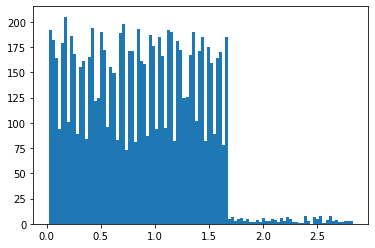

In [27]:
plt.hist(data_iqr['Operation time'].dt.total_seconds(), bins=100)

In [28]:
# remove the data below 10% and above 90% quantile
data_1090 = data[(data['Operation time'] > data['Operation time'].quantile(0.1)) & (data['Operation time'] < data['Operation time'].quantile(0.9))]

(array([189., 187., 168., 155.,  74., 171., 165., 194., 178.,  69., 190.,
        172., 171., 156.,  73., 195., 185., 163., 109., 137., 177., 193.,
        161.,  85., 160., 187., 176., 190.,  89., 166., 182., 211., 166.,
         95., 164., 182., 163., 130., 138., 191., 171., 185.,  82., 175.,
        159., 165., 167.,  91., 178.,  89.,   4.,   7.,   2.,   7.,   5.,
          5.,   2.,   2.,   4.,   2.,   7.,   2.,   3.,   5.,   4.,   6.,
          2.,   6.,   6.,   5.,   2.,   0.,   2.,   8.,   3.,   3.,   4.,
          5.,   8.,   2.,   4.,   7.,   4.,   3.,   4.,   1.,   4.,   2.,
          5.,   3.,   4.,   2.,   5.,   5.,   5.,   4.,   3.,   7.,   6.,
          4.]),
 array([0.2    , 0.22983, 0.25966, 0.28949, 0.31932, 0.34915, 0.37898,
        0.40881, 0.43864, 0.46847, 0.4983 , 0.52813, 0.55796, 0.58779,
        0.61762, 0.64745, 0.67728, 0.70711, 0.73694, 0.76677, 0.7966 ,
        0.82643, 0.85626, 0.88609, 0.91592, 0.94575, 0.97558, 1.00541,
        1.03524, 1.06507, 1.0949 ,

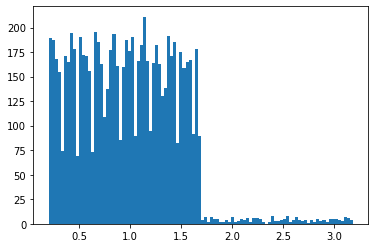

In [29]:
plt.hist(data_1090['Operation time'].dt.total_seconds(), bins=100)

In [18]:
data['Operation'].value_counts()

GetPaymentMethods     787
GetTrackingData       742
GetOrderList          739
GetItem               736
Login                 733
ModifyItem            732
GetOrder              727
SendNotification      711
ModifyOrder           709
AddItemToOrder        699
SetPayment            689
GetPaymentList        682
SetDeliveryAddress    664
GetItemList           649
Name: Operation, dtype: int64

(array([1.000e+00, 0.000e+00, 0.000e+00, 9.988e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-5270399.7  , -3827519.557, -2384639.414,  -941759.271,
          501120.872,  1944001.015,  3386881.158,  4829761.301,
         6272641.444,  7715521.587,  9158401.73 ]),
 <BarContainer object of 10 artists>)

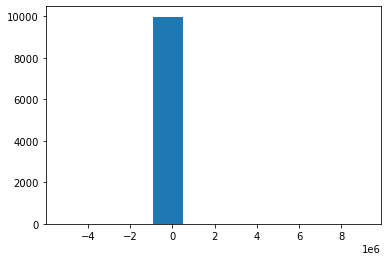

In [19]:
plt.hist(data['Operation time'].dt.total_seconds())

In [20]:
ot_min = data['Operation time'].min()
ot_max = data['Operation time'].max()

# remove the minimum and maximum values from the operation time 
data_ot = data[~((data['Operation time'] == ot_min) |(data['Operation time'] == ot_max))]

(array([9.987e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.60000000e-02, 1.79998480e+03, 3.59995360e+03, 5.39992240e+03,
        7.19989120e+03, 8.99986000e+03, 1.07998288e+04, 1.25997976e+04,
        1.43997664e+04, 1.61997352e+04, 1.79997040e+04]),
 <BarContainer object of 10 artists>)

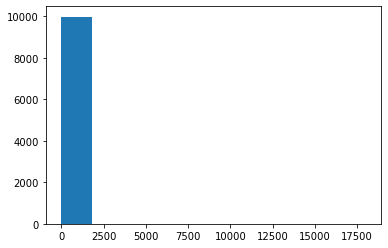

In [23]:
plt.hist(data_ot['Operation time'].dt.total_seconds())

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3315acf10>,
 'caps': [<matplotlib.lines.Line2D at 0x2a3315ad4b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3315acc40>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3315ada50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a3315add20>],
 'means': []}

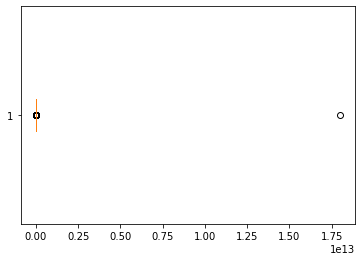

In [24]:
plt.boxplot(data_ot['Operation time'], vert=False)

In [30]:
sns.displot(x='Operation time', data=data_iqr, hue='Operation')

In [ ]:
# plot the data using box and whiskers plot in maptlplotlib

plt.boxplot(data['Response time'], vert=False)

In [ ]:
# 

In [53]:
plt.hist(data['Response time'])

(array([1002., 1000.,  999., 1000.,  999., 1000., 1000.,  999., 1000.,
        1000.]),
 array([   0. ,  999.6, 1999.2, 2998.8, 3998.4, 4998. , 5997.6, 6997.2,
        7996.8, 8996.4, 9996. ]),
 <BarContainer object of 10 artists>)

Error in callback <function flush_figures at 0x000001D3C0D96830> (for post_execute):


KeyboardInterrupt: 